In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("D:\Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.shape  

(500, 9)

In [22]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
data=data.drop(columns=['Serial No.']) #Dropping unwanted columns
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
data.isnull().sum() # Lets check of there are missing values in the colums

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
#Filling the columns containing null with the most suitable values
data['University Rating']=data['University Rating'].fillna(data[ 'University Rating'].mode()[0])
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [13]:
#lets check now if there are null values
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
#Now all the dataset are filled with values we are good to go ahead

In [ ]:
#Lets check if the data is normally distributed,since we are going to apply
#regression so we must  make sure of that

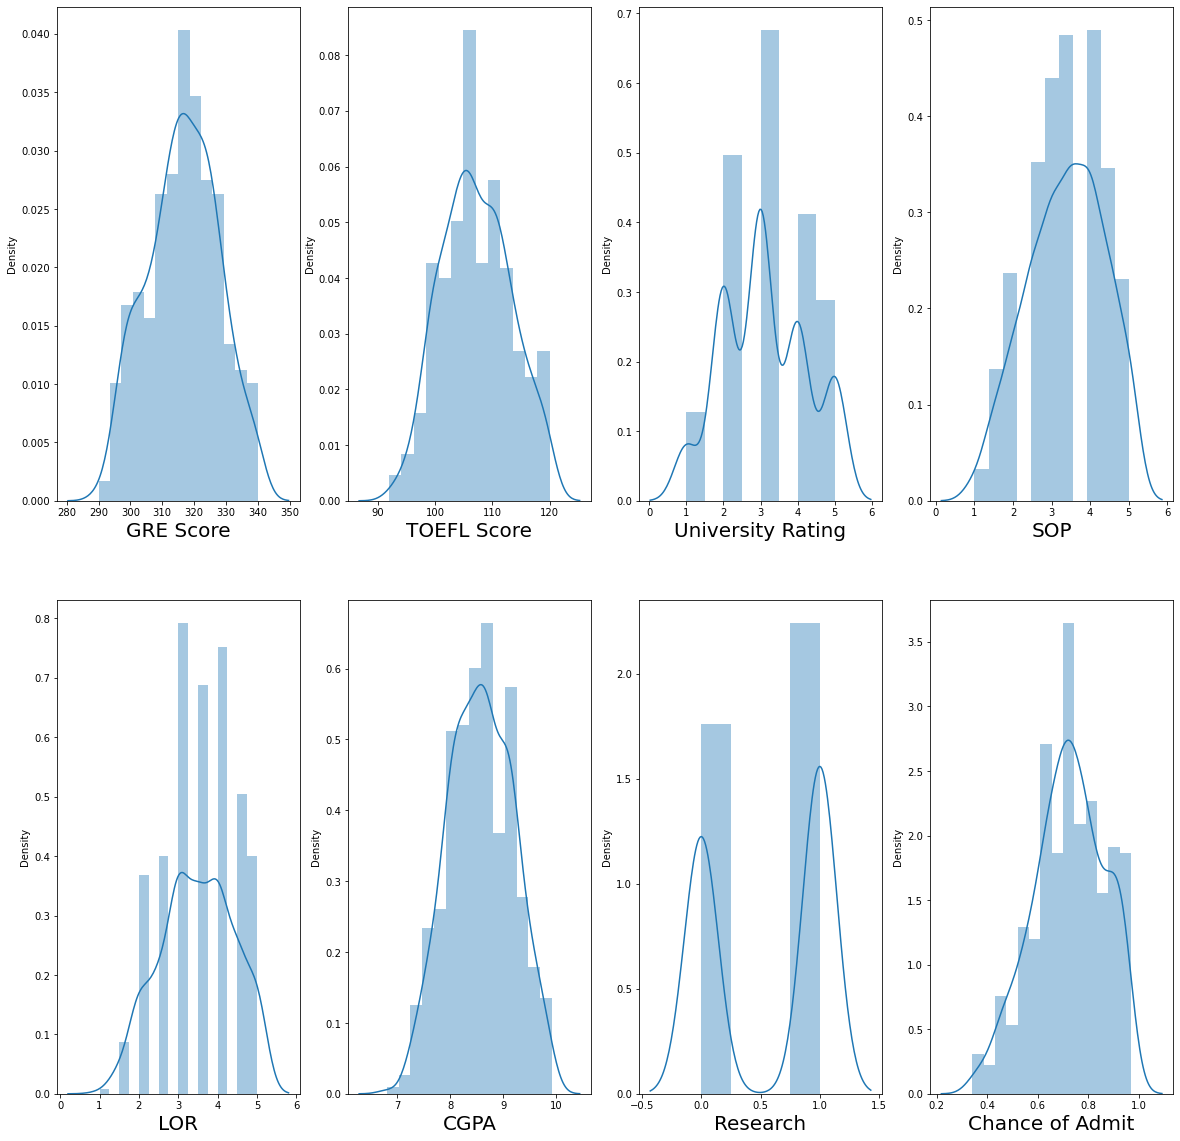

In [14]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [29]:
#The data distribution looks good and there is no skewness in there,for categorical columns ignore the distributtion.
#lets gp ahead and explore the data using visualisation to see the relatiomship between label and feauters
#So we divided label data and feature fata for analysis and comparision and find some sort of relationship.

In [16]:

X=data.drop(columns=['Chance of Admit'])

y=data['Chance of Admit']


In [17]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


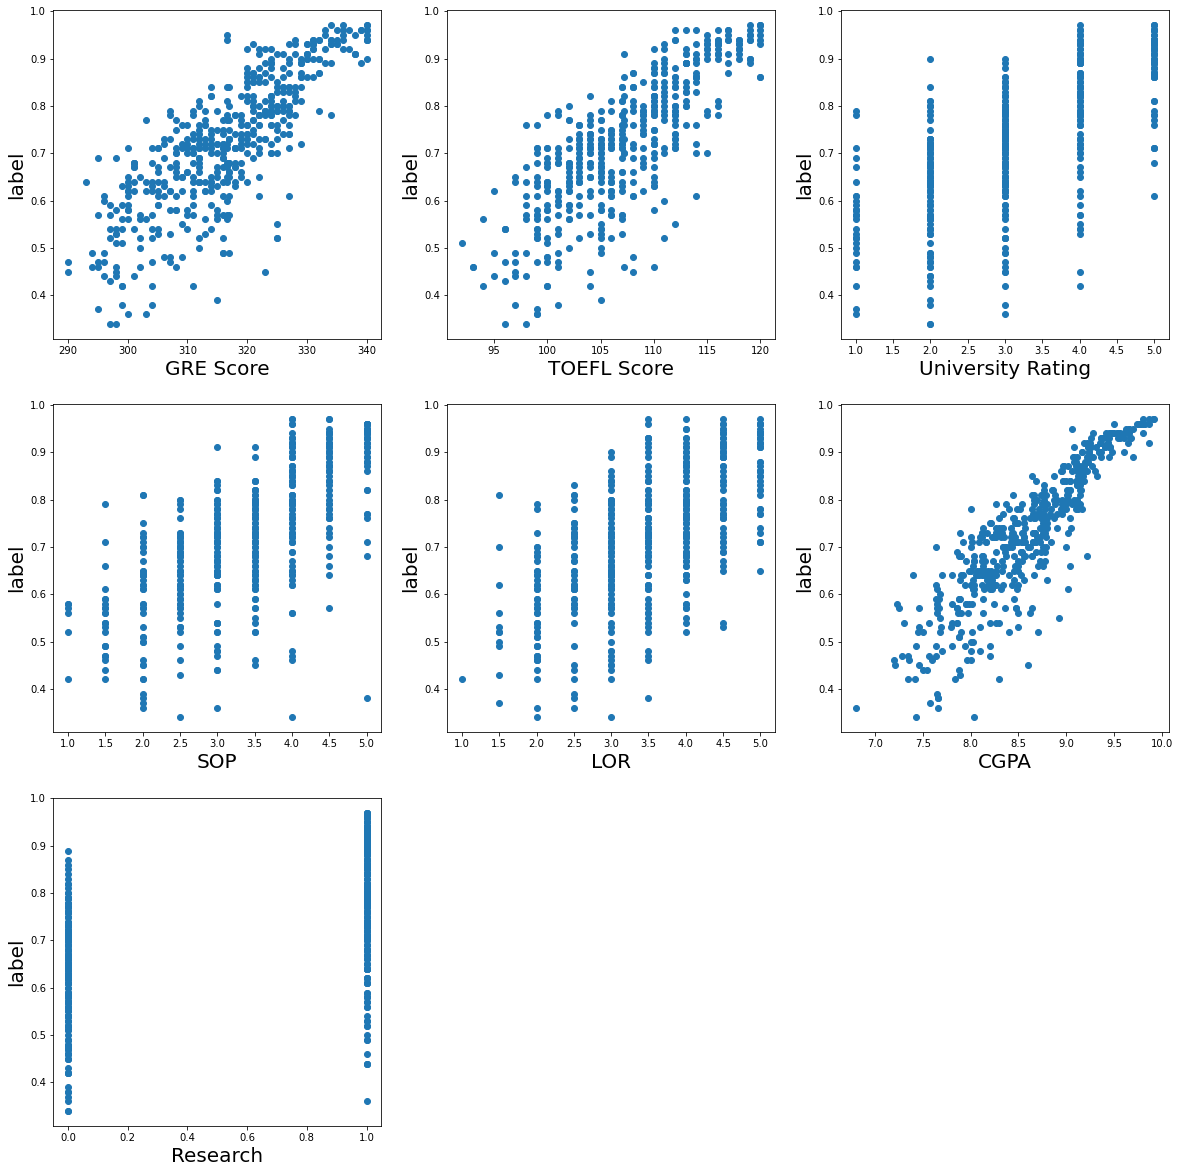

In [18]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('label',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
# As we visualise through the scatter plot that all the features are showing positive trend and therefore we 
#do not drop any columns

In [46]:
#Data Scaling.Formula Z=(X-mean)/std deviation 
#we can apply standard scaler only to fatures not to labels

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [21]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [49]:
#Lets go ahead and use linear regression and see how good it fits our data.Butv lets first split the data in train and test

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=34574)#randonm_state is same as np.random.seed
y_train.head()

469    0.86
367    0.57
344    0.47
89     0.74
96     0.48
Name: Chance of Admit, dtype: float64

In [ ]:
# we want more data in train i.e 75% to train the data and predict a pattern
#we set random as data should be serially splitted in training and  testing


In [24]:
x_train

array([[ 0.85111073,  1.12686938,  0.78200955, ...,  0.01730621,
         0.96582684,  0.88640526],
       [-0.50111259, -1.51982203, -1.87788687, ..., -1.06433187,
        -1.84777524, -1.12815215],
       [-1.94348412, -1.85065846, -0.99125473, ..., -1.60515091,
        -2.04638245, -1.12815215],
       ...,
       [ 0.76096251,  0.79603295,  0.78200955, ...,  0.55812525,
         0.70101723,  0.88640526],
       [ 1.93288938,  1.29228759,  1.66864169, ...,  1.63976333,
         1.08168105,  0.88640526],
       [-0.32081614, -1.51982203, -0.10462259, ...,  1.09894429,
        -0.4575248 ,  0.88640526]])

In [23]:
#Model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train) #.fit means we wanna train our model and we are giving only training data

LinearRegression()

In [25]:
#predicting the chance of addmisssion of given features
data.tail(2)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [27]:
print("chance of addmission is",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

chance of addmission is [0.8271649]


In [ ]:
#as we can see our model for 499th row predicted 82% chances of addmission which in close to real chance i.e 84%
#which is  good

In [28]:
#YOU CAN SAVE THE MODLE AND LATER YOU CAN USE IT AS PREDICTION
import pickle

In [29]:
filename='finalised_model.pickle'
pickle.dump(regression,open(filename,'wb'))



In [30]:
#prediction using the save model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a,

array([0.63182595])

In [ ]:
#Now we have train the model but we wanna know how well our model learned the data we wanna to know/.
#here we will use adjusted r score


In [ ]:
#Lets check for training data

In [31]:
regression.score(x_train,y_train)

0.8210428188618232

In [ ]:
#Lets check for testing data

In [32]:
regression.score(x_test,y_test) #testing data is less so model will understand less from testing data

0.8116755666930994

In [ ]:
#Now lets plot and visualise 

In [33]:
y_pred=regression.predict(x_test)

In [34]:
y_pred

array([0.59280614, 0.8033355 , 0.59571007, 0.63093202, 0.64909982,
       0.64052176, 0.81667488, 0.72578058, 0.78445939, 0.5086909 ,
       0.70225388, 0.78819766, 0.54919864, 0.86583661, 0.71581609,
       0.69244355, 0.62454428, 0.82057824, 0.91746234, 0.55335478,
       0.80057663, 0.77895283, 0.75003414, 0.58307549, 0.76880856,
       0.59487923, 0.68813149, 0.6091428 , 0.62023534, 0.77573164,
       0.85269751, 0.81937518, 0.67238447, 0.76903574, 0.76830047,
       0.5863958 , 0.7759021 , 0.73495519, 0.81239142, 0.76886219,
       0.69148868, 0.76663337, 0.9243677 , 0.62931241, 0.66267189,
       0.65666479, 0.93937973, 0.59321579, 0.50368173, 0.63204354,
       0.66101342, 0.71743786, 0.9364208 , 0.83660865, 0.56627028,
       0.60455645, 0.95074136, 0.90425415, 0.705285  , 0.72019261,
       0.66118097, 0.91308524, 0.75867876, 0.82079115, 0.52826818,
       0.75690445, 0.87510044, 0.53830566, 0.84504292, 0.92089548,
       0.89486064, 0.60377463, 0.72922684, 0.64929751, 0.89393

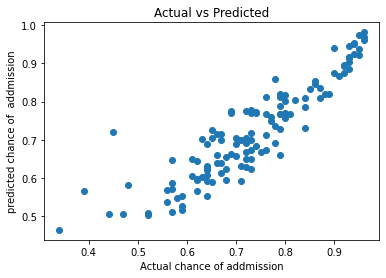

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of addmission')
plt.ylabel('predicted chance of  addmission')
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
#as we can analyse in the previous fig how predicted and real is :eg.first point predicted is .566% but real
#is .43 so there is an error
#Evaluation techniques comes to play now as we want some facts to check our moddle as error in predicted and real value overall
#inthe model
#

 from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
 from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mean_squared_error(y_test,y_pred) #use when we think there are some noise/outliers 

0.0033057717724960124

In [ ]:
# we can see that the model is giving 000.3 error which is accepatb;e

In [39]:
mean_absolute_error(y_test,y_pred)

0.0438090158125401

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred)) #RMSE

0.05749584134957947